In [1]:
%matplotlib inline
%time from hikyuu.interactive.interactive import *

from pylab import plot

Wall time: 18.6 s


In [2]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)


In [3]:
my_tm

<TradeManager {
  params: params[precision(i): 2, reinvest(b): 0, save_action(b): 1, support_borrow_cash(b): 0, support_borrow_stock(b): 0, ],
  name: SYS,
  init_date: 2001-1-1 0:0:0,
  init_cash: 200000.00,
  firstDatetime: +infinity,
  lastDatetime: 2001-1-1 0:0:0,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current cash: 200000.00,
  current market_value: 0.00,
  current short_market_value: 0.00,
  current base_cash: 200000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
  Short Position: 
  Borrow Stock: 
}>

In [4]:
my_sys = SYS_Simple(tm=my_tm)
print(my_sys)

System{
  SYS_Simple,
  params[cn_open_position(b): 0, delay(b): 1, delay_use_current_price(b): 1, ev_open_position(b): 0, ignore_sell_sg(b): 0, max_delay_count(i): 3, support_borrow_cash(b): 0, support_borrow_stock(b): 0, tp_delay_n(i): 3, tp_monotonic(b): 1, ],
  Environment(NULL),
  Condition(NULL),
  MoneyManager(NULL),
  Signal(NULL),
  Stoploss(NULL),
  Stoploss(NULL),
  ProfitGoal(NULL),
  Slippage(NULL),

  TradeManager {
  params: params[precision(i): 2, reinvest(b): 0, save_action(b): 1, support_borrow_cash(b): 0, support_borrow_stock(b): 0, ],
  name: SYS,
  init_date: 2001-1-1 0:0:0,
  init_cash: 200000.00,
  firstDatetime: +infinity,
  lastDatetime: 2001-1-1 0:0:0,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current cash: 200000.00,
  current market_value: 0.00,
  current short_market_value: 0.00,
  current base_cash: 200000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
  Short Position: 
  Borrow Stock: 
}

In [5]:
def TurtleSG(self):
     n1 = self.getParam("n1")
     n2 = self.getParam("n2")
     k = self.getTO()
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._addBuySignal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._addSellSignal(k[i].datetime)

In [6]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_FixedCount(1000)

s = sm['sz000001']
query = QueryByDate(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

In [7]:
calendar = sm.getTradingCalendar(query, 'SZ')
calendar

In [8]:
x1 = my_tm.getFundsCurve(calendar, Query.DAY)

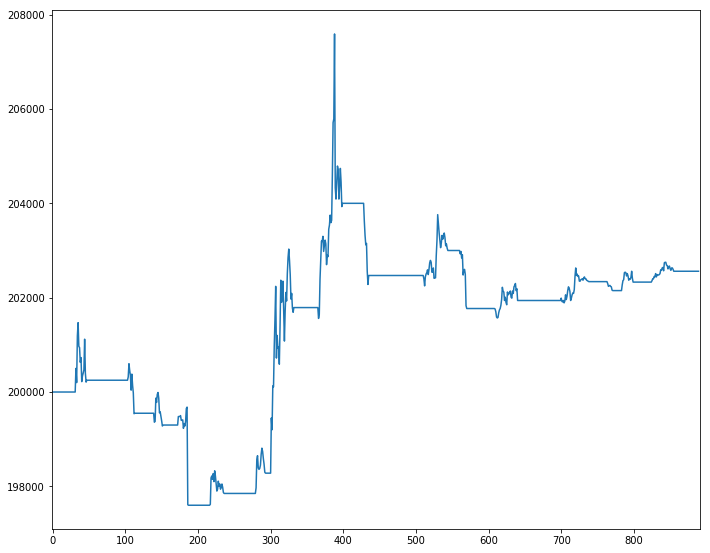

In [9]:
PRICELIST(x1).plot()